In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../data/iiwase_log_no_avg.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])
df.head(30)

FileNotFoundError: [Errno 2] No such file or directory: '../data/iiwasw_log_no_avg.csv'

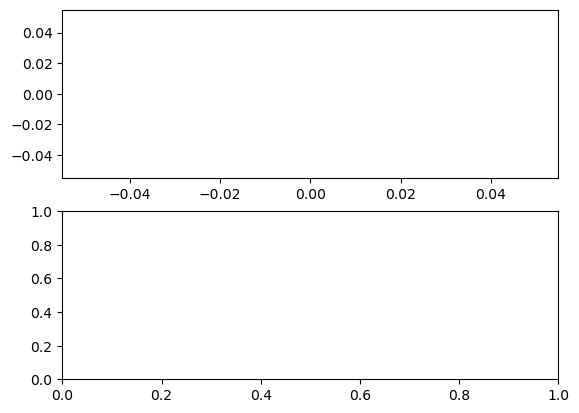

In [ ]:
fig, ax = plt.subplots(2, 1)

df1 = df[df["signal"]==" ek_bar"]
df2 = df[df["signal"]==" bias"]
df3 = df[df["signal"]==" gain"]
df4 = df[df["signal"]==" control"]

ax[0].plot(df1["time"], df1["value"])
ax[0].plot(df2["time"], df2["value"])
ax[0].plot(df3["time"], df3["value"])
ax[0].plot(df4["time"], df4["value"])